# 回归


最早是高尔顿1886年提出，用于研究父母和子女的身高关系。

![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20241105101533.png)


$$
Y = f(X_1,\cdots,X_p)+e
$$




## 方程法
希望Y的预测值与测量值偏差越小越好,对于n个测量

$$
Q = \sum (Y_i - (b_0+b_1X_i))^2
$$

最小化Q,最小二乘法

将回归函数的表达式改写为

$$
Y = \beta_0 + \beta_1 (X-\bar{X})
$$

上式被称为模型的中心化

$$
Q = \sum [Y_i - (\beta_0+\beta_1(X_i-\bar{X}))]^2
$$

对$\beta_0$ 和 $\beta_1$ 求偏导

$$
\frac{\partial Q}{\partial \beta_0} = -2 \sum [Y_i-\beta_0-\beta_1(X_i-\bar{X})] =0\\
\frac{\partial Q}{\partial \beta_1} = -2 \sum [Y_i-\beta_0-\beta_1(X_i-\bar{X})](X_i-\bar{X}) =0\\
$$


 
 
得到

$$
\hat{\beta_0} = \sum Y_i/n = \bar{Y}\\
\hat{\beta_1} = \frac{\sum (X_i -\bar{X})Y_i}{S^2_X}\\
$$


$\hat{\beta}_0, \hat{\beta}_1$ 均为 $Y_i$ 的线性函数

- $\hat{\beta}_0, \hat{\beta}_1$ 是 $\beta_0, \beta_1$ 的无偏估计

$$
\begin{aligned}
\text{var}(\hat{\beta}_0) &= \text{var}(\bar{Y}) = \frac{\sigma^2}{n}\\
\text{var}(\hat{\beta}_1) &= \text{var}\left( \frac{\sum (X_i - \bar{X})Y_i}{S_X^2} \right)\\
&= \sum \left( \frac{(X_i - \bar{X})^2}{S_X^2} \right) \text{var}(Y_i)\\
&= \frac{\text{var}(Y_i)}{S_X^2} = \frac{\sigma^2}{S_X^2}
\end{aligned}
$$

- 截距 $\beta_0$ 的方差由测量数据的样本决定
- $\beta_1$ 的方差由 $S_X^2$ 决定，$X$ 的点取得越紧密，方差越大，应尽量取分散的点
- 可以证明，$\beta_0$ 和 $\beta_1$ 的协方差 $\text{cov}(\beta_0, \beta_1) = 0$

$$
\begin{aligned}
Y &= \beta_0 + \beta_1 (X - \bar{X})\\  
b_0 &= \beta_0 - \beta_1 \bar{X}\\
b_1 &= \beta_1\\
\text{var}(b_0) &= \text{var}(\beta_0) + \bar{X}^2 \text{var}(\beta_1)\\
\text{var}(b_1) &= \text{var}(\beta_1)\\
\end{aligned}
$$

$\beta_0$ 和 $\beta_1$ 互相独立，而 $b_0$ 和 $b_1$ 不独立





## 矩阵法

### 1. **线性回归模型**

假设我们有一个简单的线性回归模型：

$$
\mathbf{y} = X \beta + \mathbf{\epsilon}
$$

其中：

- $\mathbf{y}$ 是 $n \times 1$ 的响应向量（观测值）。
- $X$ 是 $n \times p$ 的设计矩阵（含有自变量的数据）。
- $\beta$ 是 $p \times 1$ 的回归系数向量。
- $\mathbf{\epsilon}$ 是 $n \times 1$ 的误差向量（假定误差服从 $N(0, \sigma^2 I)$）。

### 2. **最小二乘估计**

最小二乘估计（OLS）通过最小化误差平方和来估计 $\beta$：

$$
\hat{\beta} = (X^T X)^{-1} X^T \mathbf{y}
$$

该估计量是通过对回归方程求导得到的。

### 3. **预测值与残差**

预测值 $\hat{\mathbf{y}}$ 由以下公式给出：

$$
\hat{\mathbf{y}} = X \hat{\beta} = X (X^T X)^{-1} X^T \mathbf{y}
$$

注意，这里的 $\hat{\mathbf{y}}$ 是由帽子矩阵 $\mathbf{H}$ 得到的，定义为：

$$
\mathbf{H} = X (X^T X)^{-1} X^T
$$

所以，预测值 $\hat{\mathbf{y}}$ 可以写作：

$$
\hat{\mathbf{y}} = \mathbf{H} \mathbf{y}
$$

### 4. **协方差与方差**

我们假设误差项 $\mathbf{\epsilon}$ 满足 $\mathbb{E}[\mathbf{\epsilon}] = 0$ 和 $\operatorname{Cov}(\mathbf{\epsilon}) = \sigma^2 I$（即误差项是独立同分布的）。

- 预测值 $\hat{\mathbf{y}}$ 的协方差为：

  $$
  \operatorname{Cov}(\hat{\mathbf{y}}) = \operatorname{Cov}(\mathbf{H} \mathbf{y}) = \mathbf{H} \operatorname{Cov}(\mathbf{y}) \mathbf{H}^T
  $$

  由于 $\mathbf{y}$ 由 $\mathbf{X} \beta + \mathbf{\epsilon}$ 组成，且 $\operatorname{Cov}(\mathbf{y}) = \sigma^2 I$（假设响应的协方差是恒定的），因此：
  
  $$
  \operatorname{Cov}(\hat{\mathbf{y}}) = \sigma^2 \mathbf{H}
  $$

- 观测值 $\mathbf{y}$ 的协方差是：
  
  $$
  \operatorname{Cov}(\mathbf{y}) = \sigma^2 I
  $$



## 残差估计

### 残差的定义
残差是参数估计的 $\hat{Y}$ 与测量值 $Y$ 的差，定义为：

$$ 
\delta_i = Y_i - \hat{Y}_i 
$$

显然，残差可以看作是不可观测误差 $\varepsilon_i$ 的估计。残差是诊断回归模型拟合是否良好的一种直观的工具，将在回归诊断一节中详细介绍。

### 残差的用途
1. **检验回归函数与数据的符合程度**：残差用于检验回归模型与数据的拟合程度，不随 $x$ 有特定趋势。
2. **估计 $\sigma^2$**：残差用于估计误差项 $e$ 的方差 $\sigma^2$。

### 残差的平方和估计
通常使用 $s^2$ 作为 $\sigma^2$ 的估计，定义为：

$$ 
s^2 = \frac{1}{n-2} \sum_{i=1}^{n} e_i^2 = \frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 
$$

$s^2$是$\sigma^2$的无偏估计，可以证明（证明参见定理9.4.2）。



Text(0, 0.5, 'Y values')

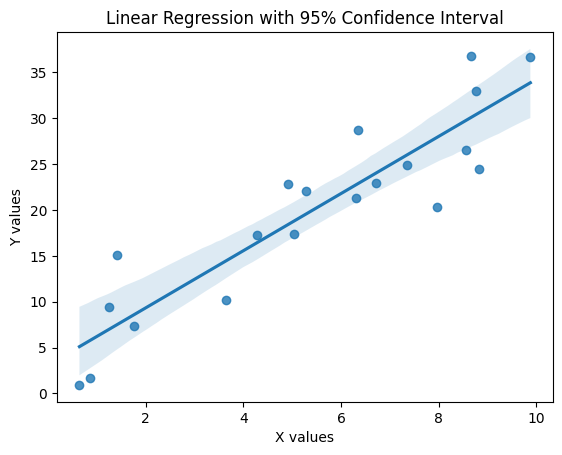

In [1]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a=3
b=4
x=st.uniform(0,10).rvs(20)
y=[np.random.normal(a*i+b,5) for i in x]

sns.regplot(x=x, y=y, ci=95)
plt.title('Linear Regression with 95% Confidence Interval')
plt.xlabel('X values')
plt.ylabel('Y values')

Text(0, 0.5, 'Residuals')

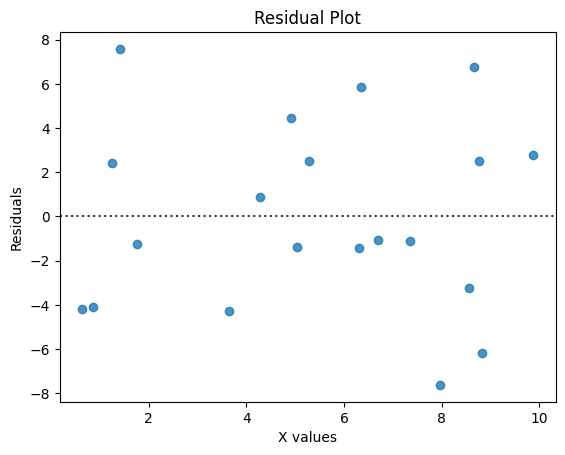

In [2]:
sns.residplot(x=x, y=y)
plt.title('Residual Plot')
plt.xlabel('X values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

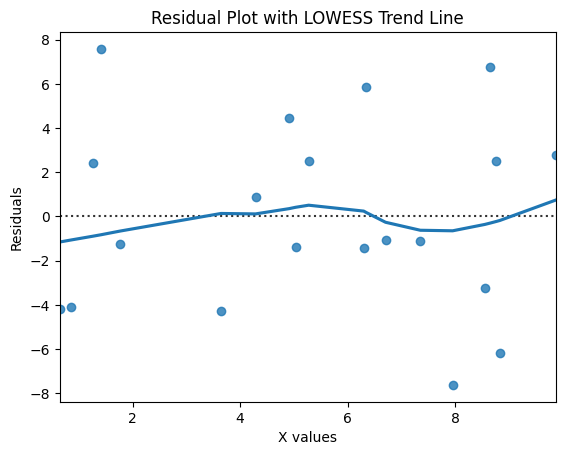

In [3]:
#检验趋势
sns.residplot(x=x, y=y,lowess=True)
plt.title('Residual Plot with LOWESS Trend Line')
plt.xlabel('X values')
plt.ylabel('Residuals')

## 显著性检验


## 线性回归的误差估计


### 参数$\beta_0$ 和$\beta_1$ 的估计


### $f(x_i)$的区间


### 回归函数$f(x)$ 的区间


### $Y_i = f(x_i) + e_i$的区间

## 自由度的计算


一个更一般的定义是：

$$
\text{df}(\hat{f}) = \frac{1}{\sigma^2} \sum_{i=1}^n \text{Cov}(\hat{Y}_i, Y_i)
$$

- 将 $X_i = x_i$ 视为固定值，而不是随机值。
- $1/\sigma^2$ 处理了随机误差项的方差。


如果我们令 $\hat{\mathbf{Y}} = (\hat{Y}_1, \ldots, \hat{Y}_n)$ 和 $\mathbf{Y} = (Y_1, \ldots, Y_n)$，我们可以将定义重写为：

$$
\text{df}(\hat{f}) = \frac{1}{\sigma^2} \text{Trace}\left(\text{Cov}(\hat{\mathbf{Y}}, \mathbf{Y})\right)
$$


所以 线性回归当中的自由度是$p$（模型中使用的变量数量）


1. 首先这里的X是固定的，所以所有的误差都是由$Y$里包含的随机项 $\epsilon$引入的。在我们假设噪声独立同分布的情况下，$\sigma^2$作为噪声的方差，可以视为方差大小的一个单位，除以$\sigma^2$是一种归一化的含义。
2. 自由度的最大值是$n$ ($\hat Y_i$完美拟合$Y_i$，包括噪声在内，很明显这种情形下是把每个响应变量的值都视为参数)，最小值是0，即常数预测器（跟任何一个$Y_i$都不相关）
3. 某些时候，可以用自由度的一些其他形式简化运算，例如$\frac{1}{\sigma^2} tr(Cov(\hat Y, Y))$，在线性模型这里就可以迅速算出结果。